In [2]:
client

Client Scheduler: tcp://127.0.0.1:44445 Dashboard: http://127.0.0.1:42053/status,Cluster Workers: 1 Cores: 1 Memory: 33.47 GB


In [3]:
NP = 16
# data_path = conf.raw_data_path + '*' # for all dataset
data_path = conf.raw_data_path + 'part-0000*'
ori_df = read_data(data_path)

#print('number of rows:',len(ori_df))

MemoryError: std::bad_alloc: CUDA error at: /home/nyongja/anaconda3/envs/dask/include/rmm/mr/device/cuda_memory_resource.hpp:69: cudaErrorMemoryAllocation out of memory

In [ ]:
columns = ['like_timestamp', 
           'retweet_timestamp',
           'reply_timestamp',
           'retweet_with_comment_timestamp']
engagement_df = ori_df[columns]

In [5]:
engagement_df["is_like"] = engagement_df["like_timestamp"].compute().applymap(lambda x : True if x > 0 else False).astype(np.bool)
engagement_df["is_retweet"] = engagement_df["retweet_timestamp"].compute().applymap(lambda x : True if x > 0 else False).astype(np.bool)
engagement_df["is_reply"] = engagement_df["reply_timestamp"].compute().applymap(lambda x : True if x > 0 else False).astype(np.bool)
engagement_df["is_retweet_with_comment"] = engagement_df["retweet_with_comment_timestamp"].compute().applymap(lambda x : True if x > 0 else False).astype(np.bool)
engagement_df['is_positive'] = engagement_df['is_reply'] | engagement_df['is_retweet'] | engagement_df['is_retweet_with_comment'] | engagement_df['is_like']
engagement_df['is_negative'] =  engagement_df['is_positive'].compute().applymap(lambda x: 1 if x == 0 else 0).astype(np.int32)

In [ ]:
engagement_df = engagement_df.drop('like_timestamp', axis = 1)
engagement_df = engagement_df.drop('retweet_timestamp', axis = 1)
engagement_df = engagement_df.drop('reply_timestamp', axis = 1)
engagement_df = engagement_df.drop('retweet_with_comment_timestamp', axis = 1)

In [12]:
df,_ = factorize_small_cardinality_with_index(ori_df, "tweet_id", "mapped_feature_tweet_id")

In [13]:
df.head()

,text_ tokens,hashtags,tweet_id,present_media,present_links,present_domains,tweet_type,language,tweet_timestamp,engaged_with_user_id,...,enaging_user_follower_count,enaging_user_following_count,enaging_user_is_verified,enaging_user_account_creation,engagee_follows_engager,reply_timestamp,retweet_timestamp,retweet_with_comment_timestamp,like_timestamp,mapped_feature_tweet_id
0,101\t11518\t35678\t10121\t10543\t10911\t66330\...,<NA>,1ED449592DD3E8AFD06C96810BFDE94B,<NA>,<NA>,<NA>,TopLevel,B0FA488F2911701DD8EC5B1EA5E322D8,1613836763,AFEBFE7CD8624080FAC332F7738A47A3,...,2313,535,False,1317424453,True,0,0,0,1613837379,340762
1,101\t33522\t34139\t865\t35773\t21202\t18244\t8...,6720A1999211A529047947AF0E541791\tDB0327A51C9C...,E7F3E2643496EA7F812645FCD5609453,Video,<NA>,<NA>,TopLevel,B4DC2F82961F1263E90DF7A942CCE0B2,1613801465,F910210C2A15E75EEA1C215DFA378DDF,...,146,198,False,1593802963,False,0,0,0,1613801858,2557376
2,101\t56898\t137\t58573\t13034\t24093\t168\t121...,49550073D480172B59981D2237E1E0CF,4CEA776FB8F319CF643BBC9D3B3FD4BB,<NA>,<NA>,<NA>,Retweet,E7F038DE3EAD397AEC9193686C911677,1613378409,1A5DC78315C16E582B874B13F4B81E2C,...,181,181,False,1312775743,True,0,0,0,0,849378
3,101\t56898\t137\t18840\t14271\t168\t188\t19528...,D1EDFADAD3149AED4D5E1867076CCAD4\t981FFC7A8BBF...,554E4F5F416A574E1731E48D95148C75,<NA>,<NA>,<NA>,Retweet,E7F038DE3EAD397AEC9193686C911677,1612667302,D93BD394F52D5E48E029BB74D58C0C4C,...,254,240,False,1573402641,True,0,0,0,1612670508,941831
4,101\t208\t11589\t10143\t85346\t16719\t10240\t8...,<NA>,5808202C9D839ACDBE6D6118981015E2,<NA>,1E3B9AF509BEB2F8E125C22716BACF4E,3306D25BD1F0AEFE292D5302A2815CDC,TopLevel,B0FA488F2911701DD8EC5B1EA5E322D8,1614087902,B39C1FC2B800F490A67E9BD381AD66FD,...,551,633,False,1239536094,False,0,0,0,0,971924


In [14]:
df['present_media'] = df['present_media'].fillna( '' )

# Media Index DafaFrame

In [17]:
df,media_index, _ = factorize_small_cardinality_with_index(df, 'present_media', 'media_type')

In [18]:
df.head()

,text_ tokens,hashtags,tweet_id,present_media,present_links,present_domains,tweet_type,language,tweet_timestamp,engaged_with_user_id,...,enaging_user_following_count,enaging_user_is_verified,enaging_user_account_creation,engagee_follows_engager,reply_timestamp,retweet_timestamp,retweet_with_comment_timestamp,like_timestamp,mapped_feature_tweet_id,media_type
0,101\t16411\t10797\t10119\t49341\t10104\t62330\...,<NA>,F1D4DB301DB94F6831CB0E967AEEAB21,,<NA>,<NA>,TopLevel,B0FA488F2911701DD8EC5B1EA5E322D8,1612652852,103A3543750532ECA0E094FB5C02DC35,...,726,False,1572546505,False,1612654453,0,0,0,2666027,0
1,101\t99843\t58719\t82272\t27128\t106\t106\t106...,<NA>,E30E737A6F02259A9FC340212E51B71F,,<NA>,<NA>,TopLevel,488B32D24BD4BB44172EB981C1BCA6FA,1613635263,AD6568942A688D949BE1D4FC05F7A823,...,839,False,1326949574,True,0,0,0,0,2503381,0
2,101\t10146\t20971\t14444\t110611\t11257\t13859...,<NA>,0FF46234A57E1D7AD27D61061EEE0B15,,<NA>,<NA>,TopLevel,B8B04128918BBF54E2E178BFF1ABA833,1613167725,2302736C739FA0BB0A13E9F99208EF33,...,1999,False,1485818264,True,0,0,0,1613167854,176730,0
3,101\t56898\t137\t18484\t10129\t10884\t10269\t1...,<NA>,DDAB35853D0D48B09341DBBB7F54982F,,<NA>,<NA>,Retweet,B0FA488F2911701DD8EC5B1EA5E322D8,1612823988,877354CA10DE3FE52601A7C1D02857A7,...,199,False,1455410785,False,0,0,0,0,2444010,0
4,101\t108\t106252\t168\t76295\t10742\t168\t3107...,DDB03277FC62DE1314F917088E511412,B730D6B804D809EA6DAEC13A74BA3A79,,<NA>,<NA>,TopLevel,9A78FC330083E72BE0DD1EA92656F3B5,1614171198,8AFA586CE93EB03FAE55D1034DC112EA,...,2289,False,1582283538,True,0,0,0,1614172469,2021015,0


In [19]:
media_index = get_media_index(media_index)

In [20]:
media_index

,index,media,number_of_Video,number_of_Photo,number_of_GIF,number_of_media
0,0,[],0,0,0,1
1,1,[GIF],0,0,1,1
2,2,"[GIF, Photo]",0,1,1,2
3,3,"[GIF, Photo, Photo]",0,2,1,3
4,4,[Photo],0,1,0,1
5,5,"[Photo, GIF]",0,1,1,2
6,6,"[Photo, Photo]",0,2,0,2
7,7,"[Photo, Photo, Photo]",0,3,0,3
8,8,"[Photo, Photo, Photo, Photo]",0,4,0,4
9,9,"[Photo, Photo, Video]",1,2,0,3


In [21]:
media_index = cudf.DataFrame(media_index)
media_index = dask_cudf.from_cudf(media_index, npartitions=2)

In [22]:
df = df.merge(media_index, left_on="media_type", right_on = "index", how='left')

In [23]:
df = df.drop('index', axis=1)
df.head()

,text_ tokens,hashtags,tweet_id,present_media,present_links,present_domains,tweet_type,language,tweet_timestamp,engaged_with_user_id,...,retweet_timestamp,retweet_with_comment_timestamp,like_timestamp,mapped_feature_tweet_id,media_type,media,number_of_Video,number_of_Photo,number_of_GIF,number_of_media
0,101\t100\t524\t11079\t16237\t11718\t63721\t133...,<NA>,FAF3E31C6387A53053A98A1F029DB7BA,Video,<NA>,<NA>,TopLevel,477ED2ED930405BF1DBF13F9BF973434,1613380531,D0051E1594A407DD8EC9A31A127B6A5E,...,0,0,0,2766852,11,[Video],1,0,0,1
1,101\t56898\t137\t14261\t32469\t11396\t11396\t1...,<NA>,8B14EED8B7ADF8739B5598B5DFF38B61,Video,<NA>,<NA>,Retweet,488B32D24BD4BB44172EB981C1BCA6FA,1614199459,25319BCB0ECD8D2B5E6921C520978EC8,...,0,0,1614199831,1534739,11,[Video],1,0,0,1
2,101\t100\t24170\t13092\t42524\t10107\t34953\t6...,<NA>,E44DC1A47C756B89714B87DAA15F18A5,Video,<NA>,<NA>,TopLevel,E6936751CBF4F921F7DE1AEF33A16ED0,1612525989,5F242AEE04A47FFEBED709CF387BC0EC,...,0,0,1612526221,2517173,11,[Video],1,0,0,1
3,101\t100\t43019\t58495\t10317\t10183\t10911\t4...,A338C5C1637BEDA847BC1237241145BC\t9A2CC1B26018...,3BEF5555A7DD2020A2558A8C2754098D,Video,EBCCD9F378AADAAD340B13A062C1CC04,E58C08C18C1493CF82B401D7CEFA9C6B,TopLevel,B8B04128918BBF54E2E178BFF1ABA833,1613501942,72F5543FAB2A30E64B1442CD827D40F2,...,0,0,0,662533,11,[Video],1,0,0,1
4,101\t68774\t29306\t10245\t100\t14120\t131\t120...,<NA>,68562BD657F9BF6A3CE4F89C16A8A6FB,Video,<NA>,<NA>,TopLevel,E6936751CBF4F921F7DE1AEF33A16ED0,1613601064,6625197900166E7601892DC5A520F88B,...,0,0,1613601299,1151522,11,[Video],1,0,0,1


In [24]:
media_df = df[["mapped_feature_tweet_id", "media_type", "media", "number_of_Video", "number_of_Photo", "number_of_GIF", "number_of_media"]]
media_df.head()

In [26]:
media_df = media_df.repartition(npartitions=NP)
media_df, = dask.persist(media_df)
_ = wait(media_df)
#media_df.to_parquet(f'/dataset/preprocessing/media_df', write_index=False)

In [27]:
media_df.head()

,mapped_feature_tweet_id,media_type,media,number_of_Video,number_of_Photo,number_of_GIF,number_of_media
0,1692921,11,[Video],1,0,0,1
1,44093,11,[Video],1,0,0,1
2,203077,11,[Video],1,0,0,1
3,1184528,11,[Video],1,0,0,1
4,45281,11,[Video],1,0,0,1


# Media dataframe analysis

In [28]:
unique_tweet_dataframe = media_df.drop_duplicates("mapped_feature_tweet_id")
unique_tweet_dataframe.head()

In [30]:
total_amount_of_photo = unique_tweet_dataframe['number_of_Video'].sum()

In [32]:
total_amount_of_photo = unique_tweet_dataframe['number_of_Photo'].sum().compute()
total_amount_of_video = unique_tweet_dataframe['number_of_Video'].sum().compute()
total_amount_of_gif = unique_tweet_dataframe['number_of_GIF'].sum().compute()
total_amount_of_media = unique_tweet_dataframe['number_of_media'].sum().compute()

The amount of photos are 1314140, that are 0.3980 of all media
The amount of photos are 191322, that are 0.0579 of all media
The amount of photos are 35972, that are 0.0109 of all media


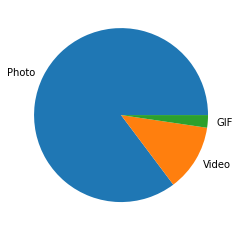

In [33]:
print(f"The amount of photos are {total_amount_of_photo}, that are {total_amount_of_photo/total_amount_of_media:.4f} of all media")
print(f"The amount of photos are {total_amount_of_video}, that are {total_amount_of_video/total_amount_of_media:.4f} of all media")
print(f"The amount of photos are {total_amount_of_gif}, that are {total_amount_of_gif/total_amount_of_media:.4f} of all media")
plt.pie([total_amount_of_photo, total_amount_of_video, total_amount_of_gif], labels=["Photo", "Video", "GIF"])
plt.show()

In [34]:
unique_tweet_dataframe[['number_of_Video']].groupby('number_of_Video').size().compute()
unique_tweet_dataframe[['number_of_GIF']].groupby('number_of_GIF').size().compute()
unique_tweet_dataframe[['number_of_media']].groupby('number_of_media').size().compute()

number_of_media
3      40894
2     158133
1    2543568
4      79889
dtype: int64

### Photo dataset analysis

In [35]:
aggregate_result = unique_tweet_dataframe[['number_of_Photo']].groupby("number_of_Photo").size().compute()
aggregate_result

number_of_Photo
4      79882
2     158095
1     555758
3      40888
0    1987861
dtype: int64

In [36]:
idx = aggregate_result.index.values.tolist()
values = aggregate_result.values.tolist()

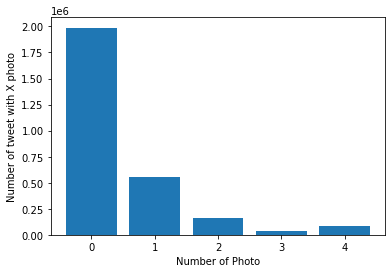

In [37]:
plt.bar(idx, values)
plt.xlabel('Number of Photo')
plt.ylabel('Number of tweet with X photo')

plt.show()

### Video dataset analysis

In [38]:
aggregate_result = unique_tweet_dataframe[['number_of_Video']].groupby("number_of_Video").size().compute()
aggregate_result

number_of_Video
4          7
2         18
1     191249
3          3
0    2631207
dtype: int64

In [39]:
idx = aggregate_result.index.values.tolist()
values = aggregate_result.values.tolist()

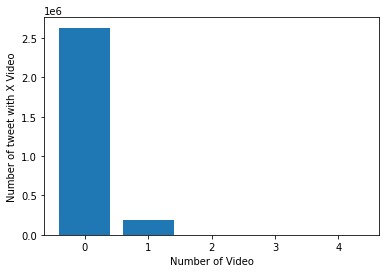

In [40]:
plt.bar(idx, values)
plt.xlabel('Number of Video')
plt.ylabel('Number of tweet with X Video')

plt.show()

### GIF dataset analysis

In [41]:
aggregate_result = unique_tweet_dataframe[['number_of_GIF']].groupby("number_of_GIF").size().compute()
aggregate_result

number_of_GIF
0    2786512
1      35972
dtype: int64

In [42]:
idx = aggregate_result.index.values.tolist()
values = aggregate_result.values.tolist()

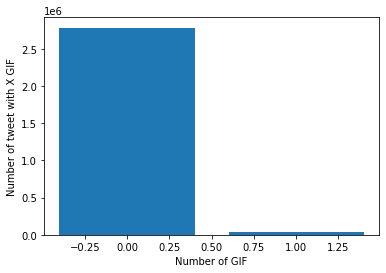

In [43]:
plt.bar(idx, values)
plt.xlabel('Number of GIF')
plt.ylabel('Number of tweet with X GIF')

plt.show()

### Total media dataset analysis

In [44]:
aggregate_result = unique_tweet_dataframe[['number_of_media']].groupby("number_of_media").size().compute()
aggregate_result

number_of_media
3      40894
2     158133
1    2543568
4      79889
dtype: int64

In [45]:
idx = aggregate_result.index.values.tolist()
values = aggregate_result.values.tolist()

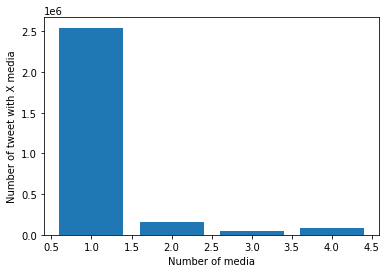

In [46]:
plt.bar(idx, values)
plt.xlabel('Number of media')
plt.ylabel('Number of tweet with X media')

plt.show()

## Correlation between number of media and type of engagement analysis

In [47]:
del unique_tweet_dataframe

In [48]:
engagement_df = engagement_df.reset_index()

In [49]:
engagement_df['number_of_media'] = df['number_of_media'].astype(np.int32)
engagement_df.head()

,id,is_like,is_retweet,is_reply,is_retweet_with_comment,is_positive,is_negative,number_of_media
0,1,True,False,False,False,True,0,1
1,2,True,False,False,False,True,0,1
2,3,True,False,False,False,True,0,1
3,4,True,False,False,False,True,0,1
4,5,False,False,False,False,False,1,1


In [50]:
engagement_df.compute().info()

<class 'cudf.core.dataframe.DataFrame'>
Int64Index: 3034943 entries, 0 to 50206
Data columns (total 8 columns):
 #   Column                   Dtype
---  ------                   -----
 0   id                       int32
 1   is_like                  bool
 2   is_retweet               bool
 3   is_reply                 bool
 4   is_retweet_with_comment  bool
 5   is_positive              bool
 6   is_negative              int32
 7   number_of_media          int32
dtypes: bool(5), int32(3)
memory usage: 72.7 MB


In [51]:
result = engagement_df.groupby("number_of_media").sum()
result.head()

,id,is_like,is_retweet,is_reply,is_retweet_with_comment,is_positive,is_negative
number_of_media,,,,,,,
4,195152341510,34681,7694,2594,620,43558,43928
1,695824452694,229235,49943,17175,4112,286988,286930
2,138553576993,20141,4467,1462,364,25282,24951
3,128702329168,17932,3927,1367,291,22471,22587


In [52]:
result['n_engagements'] = engagement_df.groupby("number_of_media").size()

In [53]:
result['like_ratio'] = result['is_like'] / result['n_engagements']
result['retweet_ratio'] = result['is_retweet'] / result['n_engagements'] 
result['reply_ratio'] = result['is_reply'] / result['n_engagements'] 
result['comment_ratio'] = result['is_retweet_with_comment'] / result['n_engagements'] 
result['negative_ratio'] = result['is_negative'] / result['n_engagements']

In [59]:
type(result.compute())

cudf.core.dataframe.DataFrame

In [58]:
result.head()

,id,is_like,is_retweet,is_reply,is_retweet_with_comment,is_positive,is_negative,n_engagements,like_ratio,retweet_ratio,reply_ratio,comment_ratio,negative_ratio
number_of_media,,,,,,,,,,,,,
4,195152341510,34681,7694,2594,620,43558,43928,87486,0.396418,0.087945,0.029650,0.007087,0.502115
1,695824436668,229230,49946,17175,4112,286986,286932,573918,0.399412,0.087026,0.029926,0.007165,0.499953
2,138553598136,20146,4464,1462,364,25284,24949,50233,0.401051,0.088866,0.029104,0.007246,0.496666
3,128702324051,17932,3927,1367,291,22471,22587,45058,0.397976,0.087154,0.030339,0.006458,0.501287


In [99]:
n_engagements = result['n_engagements'].sum().compute()
like_engagements = result['is_like'].sum().compute() / n_engagements
retweet_engagements = result['is_retweet'].sum().compute() / n_engagements
reply_engagements = result['is_reply'].sum().compute() / n_engagements
comment_engagements = result['is_retweet_with_comment'].sum().compute() / n_engagements

In [100]:
print(like_engagements)
print(retweet_engagements)
print(reply_engagements)
print(comment_engagements)

0.39908946140783275
0.08726237123279525
0.02986407997938403
0.0071191166850580485


In [101]:
idx = result.index.compute().values.tolist()
values = result['like_ratio'].compute().values.tolist()

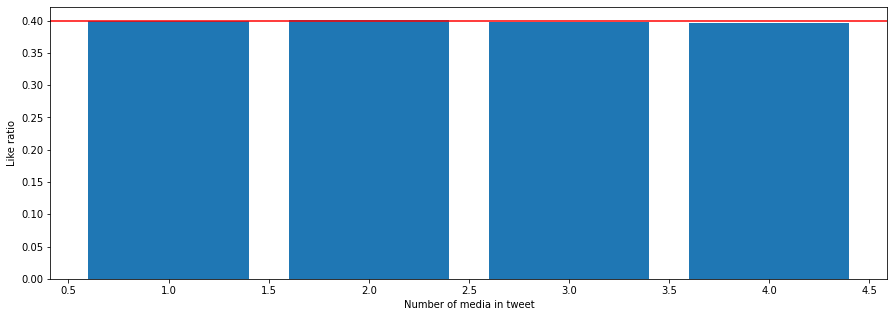

In [102]:
plt.bar(idx, values)
plt.xlabel('Number of media in tweet')
plt.ylabel('Like ratio')
plt.axhline(like_engagements, color = "red")
plt.show()

In [103]:
values = result['retweet_ratio'].compute().values.tolist()

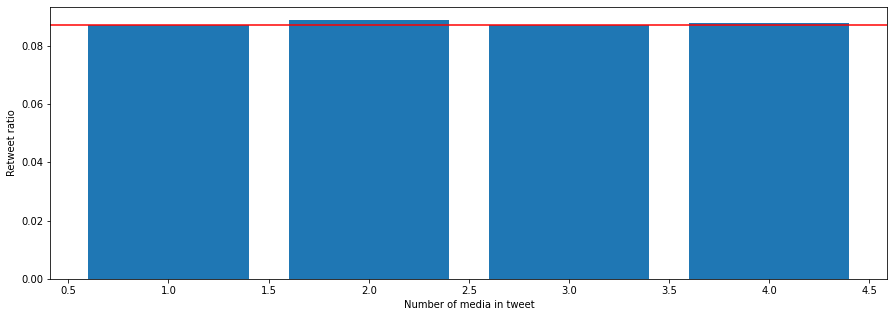

In [104]:
plt.bar(idx, values)
plt.xlabel('Number of media in tweet')
plt.ylabel('Retweet ratio')
plt.axhline(retweet_engagements, color = "red")
plt.show()

In [105]:
values = result['reply_ratio'].compute().values.tolist()

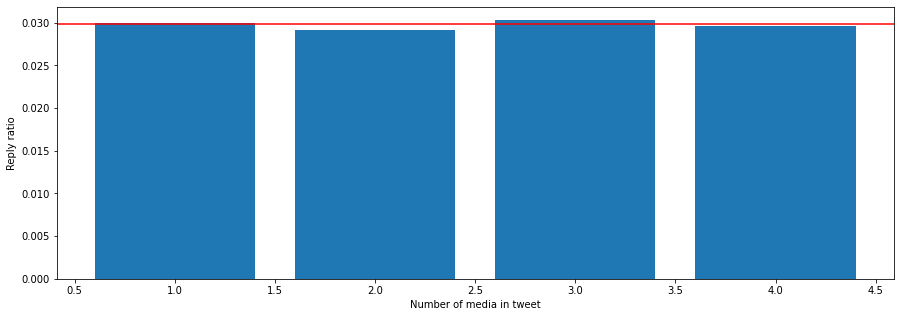

In [106]:
plt.bar(idx, values)
plt.xlabel('Number of media in tweet')
plt.ylabel('Reply ratio')
plt.axhline(reply_engagements, color = "red")
plt.show()

In [107]:
values = result['comment_ratio'].compute().values.tolist()

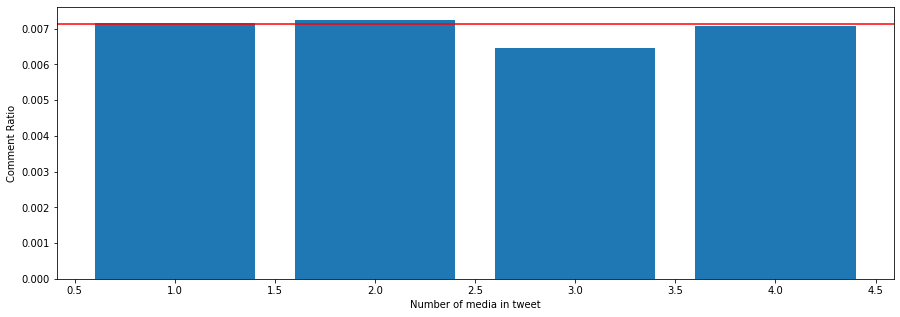

In [108]:
plt.bar(idx, values)
plt.xlabel('Number of media in tweet')
plt.ylabel('Comment Ratio')
plt.axhline(comment_engagements, color = "red")
plt.show()